In [7]:
%run T000_establish_connection.ipynb
%run T001_load_libraries.ipynb

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

call_graph_com = Graph(host, auth=(user, passwd), name='modelsmashprt')
call_graph_par = Graph(host, auth=(user, passwd), name='modeltemporaltest')

In [8]:
# name of property
name_prop = 'lpa_undirected_prt'

# get top 5 groups and their id
df_topfive = call_graph_com.run("""
    MATCH (m:Molecule)
    RETURN m.""" + name_prop + """ as lpa_id, count(*) as cnt
    ORDER BY cnt DESC
    LIMIT 5
""").to_data_frame()

list_topfive = df_topfive['lpa_id'].tolist()

In [9]:
# get molecules of top five groups
df_lpa_group1 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.""" + name_prop + """ = """ + str(list_topfive[0]) + """
    RETURN m.molecular_formula as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

df_lpa_group2 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.""" + name_prop + """ = """ + str(list_topfive[1]) + """
    RETURN m.molecular_formula as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

df_lpa_group3 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.""" + name_prop + """ = """ + str(list_topfive[2]) + """
    RETURN m.molecular_formula as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

df_lpa_group4 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.""" + name_prop + """ = """ + str(list_topfive[3]) + """
    RETURN m.molecular_formula as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

df_lpa_group5 = call_graph_com.run("""
    MATCH (m:Molecule)
    WHERE m.""" + name_prop + """ = """ + str(list_topfive[4]) + """
    RETURN m.molecular_formula as fs, m.formula_class as fc, m.OC as oc, m.HC as hc
""").to_data_frame()

df_lpa_group1

fs    fc        oc        hc
0     C10 H10 N2 O2  None  0.200000  1.000000
1     C10 H10 N2 O3  None  0.300000  1.000000
2     C10 H10 N2 O4  None  0.400000  1.000000
3     C10 H10 N2 O5  None  0.500000  1.000000
4        C10 H10 O2  None  0.200000  1.000000
...             ...   ...       ...       ...
2732       C9 H8 O8  None  0.888889  0.888889
2733    C9 H9 N1 O2  None  0.222222  1.000000
2734    C9 H9 N1 O3  None  0.333333  1.000000
2735    C9 H9 N1 O4  None  0.444444  1.000000
2736    C9 H9 N1 O5  None  0.555556  1.000000

[2737 rows x 4 columns]

In [10]:
# get average peak_relint_tic
df_par = call_graph_par.run("""
    MATCH (m:Molecule)
    WITH m.molecular_formula as fs, count(m.molecular_formula) as cnt_fs
    //WHERE cnt_fs = 13
    MATCH (m:Molecule)
    WHERE m.molecular_formula = fs 
    RETURN m.molecular_formula as fs, avg(m.normalized_intensity) as avg_int
""").to_data_frame()
print(df_par)

# merge molecules and their average peak_relint_tic
df_lpa_group1 = pd.merge(df_lpa_group1, df_par, left_on=['fs'], right_on=['fs'])
df_lpa_group2 = pd.merge(df_lpa_group2, df_par, left_on=['fs'], right_on=['fs'])
df_lpa_group3 = pd.merge(df_lpa_group3, df_par, left_on=['fs'], right_on=['fs'])
df_lpa_group4 = pd.merge(df_lpa_group4, df_par, left_on=['fs'], right_on=['fs'])
df_lpa_group5 = pd.merge(df_lpa_group5, df_par, left_on=['fs'], right_on=['fs'])

# merge molecules and their log peak_relint_tic
df_lpa_group1['log_int'] = np.log2(df_lpa_group1['avg_int'])
df_lpa_group2['log_int'] = np.log2(df_lpa_group2['avg_int'])
df_lpa_group3['log_int'] = np.log2(df_lpa_group3['avg_int'])
df_lpa_group4['log_int'] = np.log2(df_lpa_group4['avg_int'])
df_lpa_group5['log_int'] = np.log2(df_lpa_group5['avg_int'])


print(len(df_lpa_group1)+len(df_lpa_group2)+len(df_lpa_group3)+len(df_lpa_group4)+len(df_lpa_group5))

                  fs   avg_int
0      C10 H10 N2 O2  0.000018
1      C10 H10 N2 O3  0.000032
2      C10 H10 N2 O4  0.000043
3      C10 H10 N2 O5  0.000038
4      C10 H10 N2 O6  0.000029
...              ...       ...
7811     C9 H9 N1 O4  0.000070
7812     C9 H9 N1 O5  0.000068
7813     C9 H9 N1 O6  0.000043
7814  C9 H9 N1 O6 S1  0.000027
7815     C9 H9 N1 O7  0.000019

[7816 rows x 2 columns]
5363


In [11]:
df_int_development = call_graph_par.run("""
    MATCH (m:Molecule)
    OPTIONAL MATCH (m)-[s:SAME_AS]->(:Molecule)
    RETURN m.molecular_formula as fs, count(m.molecular_formula) as fs_cnt, 
        avg(m.normalized_intensity) as relint_avg, avg(s.intensity_trend) as int_trend_avg
""").to_data_frame()

df_lpa_group1_new = pd.merge(df_lpa_group1, df_int_development, left_on=['fs'], right_on=['fs'])
df_lpa_group2_new = pd.merge(df_lpa_group2, df_int_development, left_on=['fs'], right_on=['fs'])
df_lpa_group3_new = pd.merge(df_lpa_group3, df_int_development, left_on=['fs'], right_on=['fs'])
df_lpa_group4_new = pd.merge(df_lpa_group4, df_int_development, left_on=['fs'], right_on=['fs'])
df_lpa_group5_new = pd.merge(df_lpa_group5, df_int_development, left_on=['fs'], right_on=['fs'])

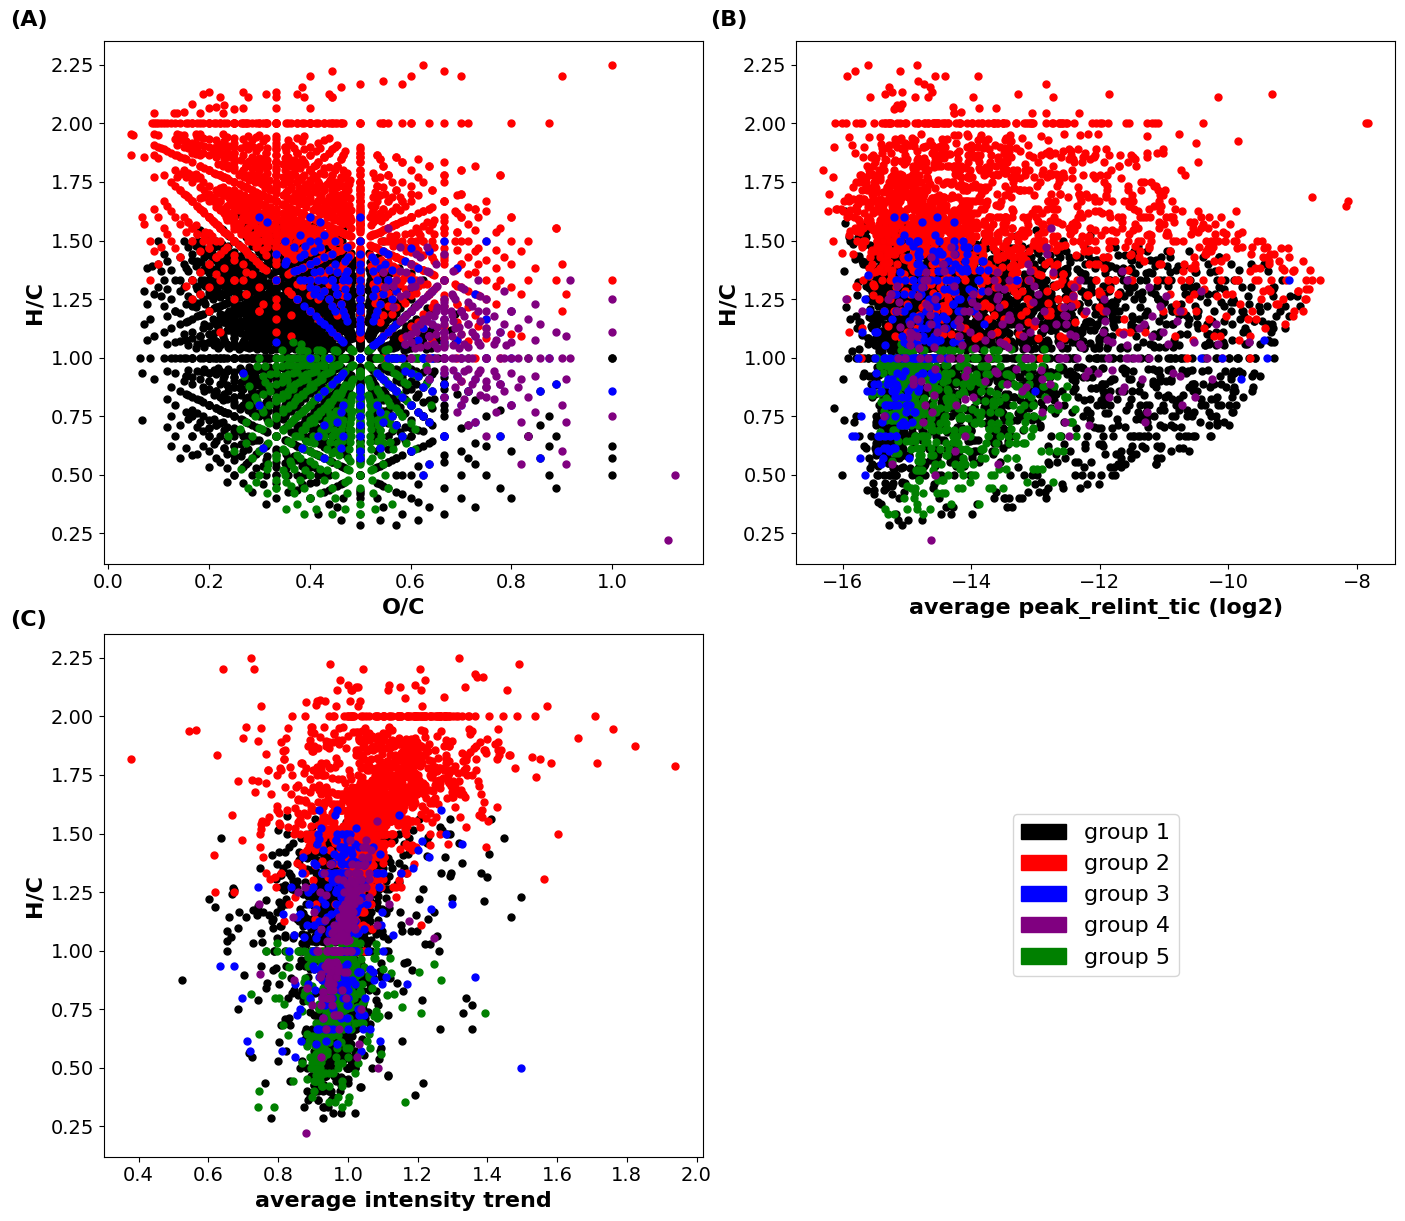

In [12]:
ps = 25
fig = plt.figure(figsize=(14,12))
#plt.suptitle('Label Propagation Algorithm - Top 5 groups with most nodes', fontweight= 'bold', fontsize=16)

plt.subplot(2,2,1)
plt.scatter(df_lpa_group1.oc, df_lpa_group1.hc, c='black', s=ps, label='group 1')
plt.scatter(df_lpa_group2.oc, df_lpa_group2.hc, c='r', s=ps, label='group 2')
plt.scatter(df_lpa_group3.oc, df_lpa_group3.hc, c='green', s=ps, label='group 3')
plt.scatter(df_lpa_group4.oc, df_lpa_group4.hc, c='blue', s=ps, label='group 4')
plt.scatter(df_lpa_group5.oc, df_lpa_group5.hc, c='purple', s=ps, label='group 5')
plt.xlabel('O/C', fontsize=16, fontweight= 'bold')
plt.ylabel('H/C', fontsize=16, fontweight= 'bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=14)

plt.subplot(2,2,2)
plt.scatter(df_lpa_group1.log_int, df_lpa_group1.hc, c='black', s=ps, label='group 1')
plt.scatter(df_lpa_group2.log_int, df_lpa_group2.hc, c='r', s=ps, label='group 2')
plt.scatter(df_lpa_group3.log_int, df_lpa_group3.hc, c='green', s=ps, label='group 3')
plt.scatter(df_lpa_group4.log_int, df_lpa_group4.hc, c='blue', s=ps, label='group 4')
plt.scatter(df_lpa_group5.log_int, df_lpa_group5.hc, c='purple', s=ps, label='group 5')
plt.xlabel('average peak_relint_tic (log2)', fontsize=16, fontweight= 'bold')
plt.ylabel('H/C', fontsize=16, fontweight= 'bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=14)

plt.subplot(2,2,3)
plt.scatter(df_lpa_group1_new.int_trend_avg, df_lpa_group1_new.hc, c='black', s=25, label='group 1')
plt.scatter(df_lpa_group2_new.int_trend_avg, df_lpa_group2_new.hc, c='red', s=25, label='group 2')
plt.scatter(df_lpa_group3_new.int_trend_avg, df_lpa_group3_new.hc, c='green', s=25, label='group 3')
plt.scatter(df_lpa_group4_new.int_trend_avg, df_lpa_group4_new.hc, c='blue', s=25, label='group 4')
plt.scatter(df_lpa_group5_new.int_trend_avg, df_lpa_group5_new.hc, c='purple', s=25, label='group 5')
plt.xlabel('average intensity trend', fontsize=16, fontweight= 'bold')
plt.ylabel('H/C', fontsize=16, fontweight= 'bold')
#plt.suptitle('Label Propagation Algorithm - Top 5 groups with most nodes', fontsize=16, fontweight= 'bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.legend(fontsize=14)

plt.subplot(2,2,4)
black_dot = mpatches.Patch(color='black', label='group 1')
red_dot = mpatches.Patch(color='red', label='group 2')
yellow_dot = mpatches.Patch(color='blue', label='group 3')
green_dot = mpatches.Patch(color='purple', label='group 4')
blue_dot = mpatches.Patch(color='green', label='group 5')
plt.legend(handles=[black_dot, red_dot, yellow_dot, green_dot, blue_dot], loc='center', bbox_to_anchor=(0.5, 0.5), fontsize=16)
plt.axis('off')

plt.figtext(0, 1, '(A)', fontsize=16, fontweight='bold')
plt.figtext(0.5, 1, '(B)', fontsize=16, fontweight='bold')
plt.figtext(0, 0.5, '(C)', fontsize=16, fontweight='bold')


plt.tight_layout()
#plt.savefig('results/lpa_undirected_prt_cnt_only_prt.png', dpi=150 ,bbox_inches='tight')
plt.show()

# analysis of communities

In [13]:
# name of property
name_prop = 'lpa_undirected_prt'

# get top 5 groups and their id
df_topfive = call_graph_com.run("""
    MATCH (m:Molecule)
    RETURN m.""" + name_prop + """ as lpa_id, count(*) as cnt
    ORDER BY cnt DESC
    LIMIT 5
""").to_data_frame()

list_topfive = df_topfive['lpa_id'].tolist()

# get molecules and properties from temporal model
df_temp = call_graph_par.run("""
    MATCH (m:Molecule)
    OPTIONAL MATCH (m)-[s:SAME_AS]->(:Molecule)
    RETURN m.molecular_formula as fs, count(m.molecular_formula) as fs_cnt, 
        avg(m.normalized_intensity) as relint_avg, avg(s.intensity_trend) as int_trend_avg
""").to_data_frame()

df_group_mem = call_graph_com.run("""
    MATCH (m:Molecule)
    RETURN m.molecular_formula as fs, m.""" + name_prop + """ as group
""").to_data_frame()

df_help = pd.merge(df_temp, df_group_mem, left_on=['fs'], right_on=['fs'])


# properties from modelsmash
list_group = []
for group in list_topfive:
    
    dict_group = {}
    
    # member of groups
    df_group_mem = call_graph_com.run("""
        MATCH (m:Molecule)
        WHERE m.""" + name_prop + """ = """ + str(group) + """
        RETURN m.""" + name_prop + """, count(*) AS member, 
            avg(m.HC) as hc_avg, avg(m.OC) as oc_avg
    """).to_data_frame()
    
    # properties of groups
    df_group = call_graph_com.run("""
        MATCH (m:Molecule)-[ct:CHEMICAL_TRANSFORMATION]->(m2:Molecule)
        WHERE m.""" + name_prop + """ = """ + str(group) + """
            AND m2.""" + name_prop + """ = """ + str(group) + """
        RETURN m.""" + name_prop + """ AS group, sum(ct.transition_count) AS ct_sum, 
            avg(ct.transition_count) AS ct_avg, sum(ct.prt_count) AS prt_sum, 
            avg(ct.prt_count) AS prt_avg
    """).to_data_frame()
    
    # keep molecules in df from current group
    df_keep = df_help[df_help['group'] == group]
    
    # most occurring transformation units
    df_tu_list = call_graph_com.run("""
        MATCH (m:Molecule)-[ct:CHEMICAL_TRANSFORMATION]->(m2:Molecule)
        WHERE m.""" + name_prop + """ = """ + str(group) + """
            AND m2.""" + name_prop + """ = """ + str(group) + """
        WITH ct.tu as tu, count(ct.tu) as tu_cnt
        RETURN tu, tu_cnt
        ORDER BY tu_cnt DESC
        LIMIT 5
    """).to_data_frame()    
    
    # dictionary of properties
    dict_group = {
        "group": df_group['group'][0],
        "member": df_group_mem['member'][0],
        "occurrence_avg": round(df_keep.fs_cnt.mean(),2),
        "relint_avg_avg": round(df_keep.relint_avg.mean(),5),
        "int_trend_avg_avg": round(df_keep.int_trend_avg.mean(),2),
        "hc_avg": round(df_group_mem['hc_avg'][0],2),
        "oc_avg": round(df_group_mem['oc_avg'][0],2),
        "pot_sum": round(df_group['ct_sum'][0],2),
        "pot_avg": round(df_group['ct_avg'][0],2),
        "prt_sum": df_group['prt_sum'][0],
        "prt_avg": round(df_group['prt_avg'][0],2),
        'most_occurr_tu': df_tu_list.tu.to_list()
    }

    # list of dictionaries
    list_group.append(dict_group)
    
df_groups = pd.DataFrame(list_group)
df_groups

group  member  occurrence_avg  relint_avg_avg  int_trend_avg_avg  hc_avg  \
0    225    2737           10.95         0.00017               0.98    1.07   
1     30    1710            9.36         0.00019               1.07    1.61   
2   1495     466           10.49         0.00006               0.97    0.78   
3     14     253            8.95         0.00007               0.98    1.11   
4    233     200           11.92         0.00017               0.98    1.08   

   oc_avg  pot_sum  pot_avg  prt_sum  prt_avg most_occurr_tu  
0    0.39   214963    10.50    34437     1.68         [None]  
1    0.41    90739     9.20    15069     1.53         [None]  
2    0.44    32011    10.06     5231     1.64         [None]  
3    0.53     9559     8.25     1843     1.59         [None]  
4    0.71    10208    10.87     1469     1.56         [None]

In [14]:
df_1_only_prt = df_lpa_group1_new.fs.to_list()
df_2_only_prt = df_lpa_group2_new.fs.to_list()
df_3_only_prt = df_lpa_group3_new.fs.to_list()
df_4_only_prt = df_lpa_group4_new.fs.to_list()
df_5_only_prt = df_lpa_group5_new.fs.to_list()

In [15]:
df_ufz = pd.read_csv("/home/philipp/Desktop/github/temporal-graphs-neo4j/models/files_for_model/Photodatensatz_Graphanalyse_formulas_2020-09-10.csv", sep=';')
df_ufz = df_ufz[['formula_string', 'peak_intensity_rank', 'formula_mass_nominal']]
df_ufz = df_ufz.groupby(['formula_string'], as_index=False).mean()

In [16]:
df_ufz

formula_string  peak_intensity_rank  formula_mass_nominal
0      C10 H10 N2 O12          7650.000000                 350.0
1       C10 H10 N2 O2          8931.600000                 190.0
2       C10 H10 N2 O3          6508.285714                 206.0
3       C10 H10 N2 O4          5028.090909                 222.0
4       C10 H10 N2 O5          5574.846154                 238.0
...               ...                  ...                   ...
18917  C9 H9 N5 O2 S2          7444.000000                 283.0
18918  C9 H9 N5 O3 S2          7652.000000                 299.0
18919  C9 H9 N5 O4 S1          9670.000000                 283.0
18920  C9 H9 N5 O4 S2          7714.666667                 315.0
18921  C9 H9 N5 O5 S2          9651.000000                 331.0

[18922 rows x 3 columns]

In [17]:
df_lpa_group1_new = pd.merge(df_lpa_group1, df_ufz, left_on=['fs'], right_on=['formula_string'])
df_lpa_group2_new = pd.merge(df_lpa_group2, df_ufz, left_on=['fs'], right_on=['formula_string'])
df_lpa_group3_new = pd.merge(df_lpa_group3, df_ufz, left_on=['fs'], right_on=['formula_string'])
df_lpa_group4_new = pd.merge(df_lpa_group4, df_ufz, left_on=['fs'], right_on=['formula_string'])
df_lpa_group5_new = pd.merge(df_lpa_group5, df_ufz, left_on=['fs'], right_on=['formula_string'])

In [18]:
df_lpa_group1_new

fs    fc        oc        hc   avg_int    log_int  \
0     C10 H10 N2 O2  None  0.200000  1.000000  0.000018 -15.797348   
1     C10 H10 N2 O3  None  0.300000  1.000000  0.000032 -14.950368   
2     C10 H10 N2 O4  None  0.400000  1.000000  0.000043 -14.505609   
3     C10 H10 N2 O5  None  0.500000  1.000000  0.000038 -14.688028   
4        C10 H10 O2  None  0.200000  1.000000  0.000098 -13.315324   
...             ...   ...       ...       ...       ...        ...   
2731       C9 H8 O8  None  0.888889  0.888889  0.000040 -14.610473   
2732    C9 H9 N1 O2  None  0.222222  1.000000  0.000026 -15.242269   
2733    C9 H9 N1 O3  None  0.333333  1.000000  0.000047 -14.368035   
2734    C9 H9 N1 O4  None  0.444444  1.000000  0.000070 -13.802286   
2735    C9 H9 N1 O5  None  0.555556  1.000000  0.000068 -13.848028   

     formula_string  peak_intensity_rank  formula_mass_nominal  
0     C10 H10 N2 O2          8931.600000                 190.0  
1     C10 H10 N2 O3          6508.285714                 206.0  
2     C10 H10 N2 O4          5028.090909                 222.0  
3     C10 H10 N2 O5          5574.846154                 238.0  
4        C10 H10 O2          2493.615385                 162.0  
...             ...                  ...                   ...  
2731       C9 H8 O8          5476.230769                 244.0  
2732    C9 H9 N1 O2          7285.100000                 163.0  
2733    C9 H9 N1 O3          4643.307692                 179.0  
2734    C9 H9 N1 O4          3342.076923                 195.0  
2735    C9 H9 N1 O5          3410.615385                 211.0  

[2736 rows x 9 columns]

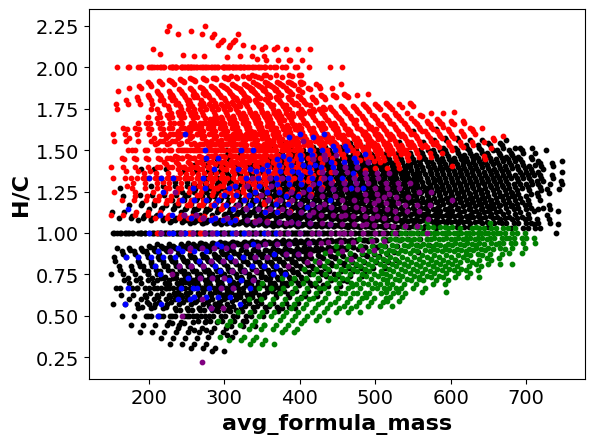

In [19]:
ps = 10
plt.scatter(df_lpa_group1_new.formula_mass_nominal, df_lpa_group1.hc, c='black', s=ps, label='group 1')
plt.scatter(df_lpa_group2_new.formula_mass_nominal, df_lpa_group2.hc, c='r', s=ps, label='group 2')
plt.scatter(df_lpa_group3_new.formula_mass_nominal, df_lpa_group3.hc, c='green', s=ps, label='group 3')
plt.scatter(df_lpa_group4_new.formula_mass_nominal, df_lpa_group4.hc, c='blue', s=ps, label='group 4')
plt.scatter(df_lpa_group5_new.formula_mass_nominal, df_lpa_group5.hc, c='purple', s=ps, label='group 5')
plt.xlabel('avg_formula_mass', fontsize=16, fontweight= 'bold')
plt.ylabel('H/C', fontsize=16, fontweight= 'bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

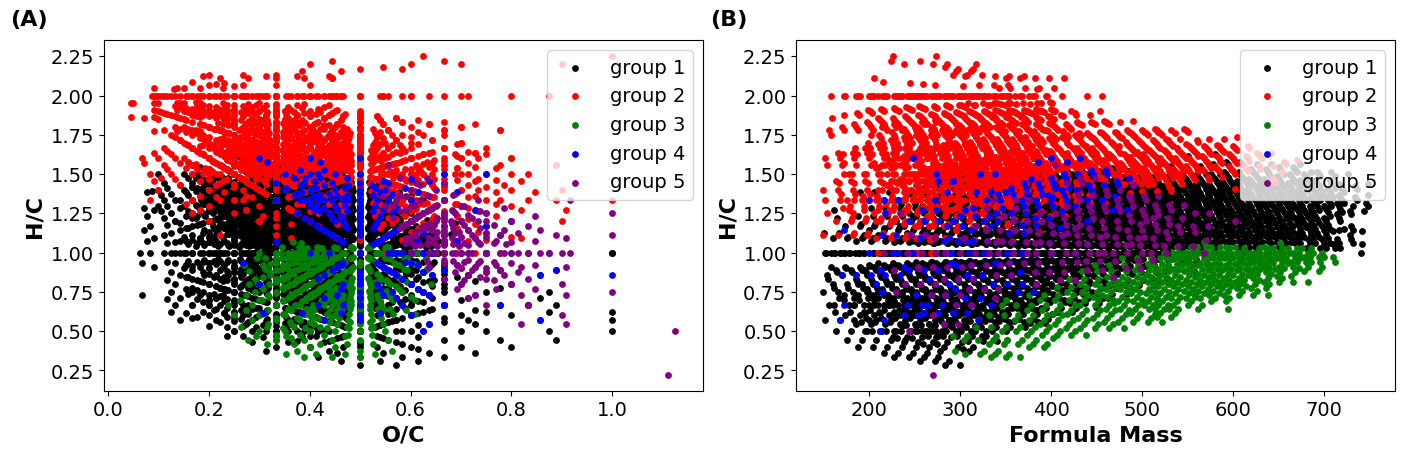

In [57]:
ps = 15
fig = plt.figure(figsize=(14,8))
#plt.suptitle('Label Propagation Algorithm - Top 5 groups with most nodes', fontweight= 'bold', fontsize=16)

plt.subplot(2,2,1)
plt.scatter(df_lpa_group1.oc, df_lpa_group1.hc, c='black', s=ps, label='group 1')
plt.scatter(df_lpa_group2.oc, df_lpa_group2.hc, c='r', s=ps, label='group 2')
plt.scatter(df_lpa_group3.oc, df_lpa_group3.hc, c='green', s=ps, label='group 3')
plt.scatter(df_lpa_group4.oc, df_lpa_group4.hc, c='blue', s=ps, label='group 4')
plt.scatter(df_lpa_group5.oc, df_lpa_group5.hc, c='purple', s=ps, label='group 5')
plt.xlabel('O/C', fontsize=16, fontweight= 'bold')
plt.ylabel('H/C', fontsize=16, fontweight= 'bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.subplot(2,2,2)
plt.scatter(df_lpa_group1_new.formula_mass_nominal, df_lpa_group1.hc, c='black', s=ps, label='group 1')
plt.scatter(df_lpa_group2_new.formula_mass_nominal, df_lpa_group2.hc, c='r', s=ps, label='group 2')
plt.scatter(df_lpa_group3_new.formula_mass_nominal, df_lpa_group3.hc, c='green', s=ps, label='group 3')
plt.scatter(df_lpa_group4_new.formula_mass_nominal, df_lpa_group4.hc, c='blue', s=ps, label='group 4')
plt.scatter(df_lpa_group5_new.formula_mass_nominal, df_lpa_group5.hc, c='purple', s=ps, label='group 5')
plt.xlabel('Formula Mass', fontsize=16, fontweight= 'bold')
plt.ylabel('H/C', fontsize=16, fontweight= 'bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

plt.figtext(0, 1, '(A)', fontsize=16, fontweight='bold')
plt.figtext(0.5, 1, '(B)', fontsize=16, fontweight='bold')


plt.tight_layout()
#plt.savefig('results/lpa_undirected_prt_cnt_only_prt_new.png', dpi=150 ,bbox_inches='tight')
plt.show()

In [96]:
mf_list = df_lpa_group1_new.fs.to_list()
mf_list

['C10 H10 N2 O2',
 'C10 H10 N2 O3',
 'C10 H10 N2 O4',
 'C10 H10 N2 O5',
 'C10 H10 O2',
 'C10 H10 O3',
 'C10 H10 O4',
 'C10 H11 N1 O2',
 'C10 H11 N1 O3',
 'C10 H11 N1 O4',
 'C10 H4 O4',
 'C10 H4 O5',
 'C10 H4 O6',
 'C10 H4 O7',
 'C10 H4 O8',
 'C10 H5 N1 O4',
 'C10 H5 N1 O5',
 'C10 H5 N1 O6',
 'C10 H5 N1 O7',
 'C10 H6 N2 O5',
 'C10 H6 N2 O6',
 'C10 H6 O3',
 'C10 H6 O4',
 'C10 H6 O5',
 'C10 H6 O6',
 'C10 H6 O7',
 'C10 H6 O8',
 'C10 H7 N1 O2',
 'C10 H7 N1 O3',
 'C10 H7 N1 O4',
 'C10 H7 N1 O5',
 'C10 H7 N1 O6',
 'C10 H7 N1 O7',
 'C10 H8 N2 O2',
 'C10 H8 N2 O3',
 'C10 H8 N2 O4',
 'C10 H8 N2 O5',
 'C10 H8 N2 O6',
 'C10 H8 O2',
 'C10 H8 O3',
 'C10 H8 O4',
 'C10 H8 O5',
 'C10 H8 O6',
 'C10 H9 N1 O2',
 'C10 H9 N1 O3',
 'C10 H9 N1 O4',
 'C10 H9 N1 O5',
 'C10 H9 N1 O6',
 'C11 H10 N2 O3',
 'C11 H10 N2 O4',
 'C11 H10 N2 O5',
 'C11 H10 N2 O6',
 'C11 H10 N2 O7',
 'C11 H10 O1',
 'C11 H10 O2',
 'C11 H10 O3',
 'C11 H10 O4',
 'C11 H10 O5',
 'C11 H11 N1 O2',
 'C11 H11 N1 O3',
 'C11 H11 N1 O4',
 'C11 H11 N1

In [110]:
df_ufz = pd.read_csv("/home/philipp/Desktop/github/temporal-graphs-neo4j/models/files_for_model/Photodatensatz_Graphanalyse_formulas_2020-09-10.csv", sep=';')
df_ufz = df_ufz[['formula_string', 'occurrence_count', 'measurement_rank']]
#df_ufz = df_ufz[df_ufz.occurrence_count == 13]

mf_list = df_lpa_group5_new.fs.to_list()
formula_list = mf_list

spearman_list = []
pvalue_list = []
for ele in formula_list:
    rank_list = df_ufz[df_ufz.formula_string == ele].measurement_rank.to_list()
    rank_list_length = list(range(1, len(rank_list)+1))
    #print(rank_list)
    #print(rank_list_length)
    spearman_list.append(stats.spearmanr(rank_list_length, rank_list).correlation)
    pvalue_list.append(stats.spearmanr(rank_list_length, rank_list).pvalue)
    
print(np.mean(spearman_list))
print(np.mean(pvalue_list))

0.18658145474440802
nan


In [106]:
pvalue_list

[0.1881204043741873,
 0.4316113520383278,
 0.23454006709519432,
 0.007318569842104322,
 0.0006209883849300375,
 0.009509496050393583,
 0.3839365166506743,
 0.48877630451924314,
 0.030554114172937866,
 0.017792450692375696,
 0.32822651147136733,
 0.004107709360574612,
 1.8782484299388895e-06,
 0.00014744785947619764,
 1.7507283021964818e-10,
 0.1482311614811614,
 0.08155281477260236,
 0.6646331617926677,
 0.11237597055825145,
 0.20000000000000007,
 0.8191508555699912,
 0.8027630076692551,
 0.08991308230865638,
 0.24662526251007164,
 0.19031133830950456,
 0.2922911964687993,
 0.8866190227890784,
 0.3103760917056799,
 0.7615000227827016,
 0.28788283230482103,
 0.34400021825867,
 0.1808891631049407,
 0.07536233505348364,
 0.6238376647810728,
 0.2452650007307772,
 0.33173980143301507,
 0.9573761750901849,
 0.05807305801714863,
 0.8866190227890784,
 0.11728306543614495,
 0.006088305245824148,
 0.010626342128568129,
 0.7204393525218342,
 0.014902667686230067,
 0.14974854155496814,
 0.00022021

In [103]:
stats.spearmanr(a,b)

SpearmanrResult(correlation=-1.0, pvalue=0.0)